In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_comparisons(x, y1, y2, y3, y4, y_label, save_loc, y1_err=None, y2_err=None, y3_err=None, y4_err=None):
    # create an index list for x-values
    x_values = range(len(x))
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)
    y4 = np.array(y4)

    fig, ax = plt.subplots()
    # add std err if over multiple seeds
    if y1_err is not None:
        y1_err = np.array(y1_err)
        y2_err = np.array(y2_err)
        y3_err = np.array(y3_err)
        y4_err = np.array(y4_err)
        ax.fill_between(x_values, y1-y1_err, y1+y1_err, color='black', alpha=0.1)
        ax.fill_between(x_values, y2-y2_err, y2+y2_err, color='green', alpha=0.1)
        ax.fill_between(x_values, y3-y3_err, y3+y3_err, color='deeppink', alpha=0.1)
        ax.fill_between(x_values, y4-y4_err, y4+y4_err, color='cornflowerblue', alpha=0.1)
    ax.plot(x_values, y1, marker='o', color='black', label='RLHF')
    ax.plot(x_values, y2, marker='o', color='green', label='Feature Preference')
    ax.plot(x_values, y3, marker='o', color='deeppink', label='Feature Preference+Prag (Ours)')
    ax.plot(x_values, y4, marker='o', color='cornflowerblue', label='RLHF+Prag')

    # set x-ticks to be the comparison values
    ax.set_xticks(x_values)
    ax.set_xticklabels(x)
    ax.yaxis.set_ticks(np.arange(0.5, 1.05, 0.1))

    ax.set_xlabel('Number of Comparisons')
    ax.set_ylabel(y_label)
    ax.set_ylim(ymin=0.5)
    ax.legend(loc='lower right')
    plt.savefig(save_loc + '/0' + y_label + '_comparisons.pdf')

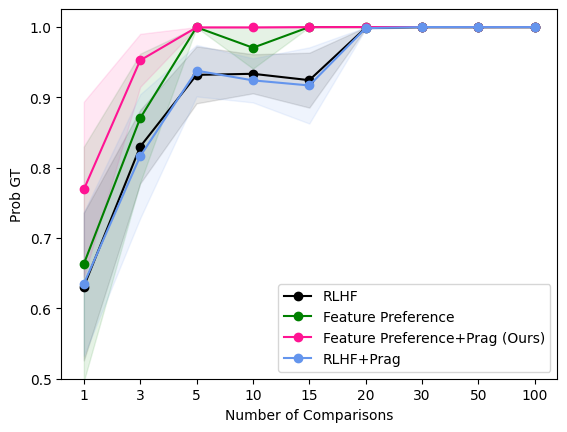

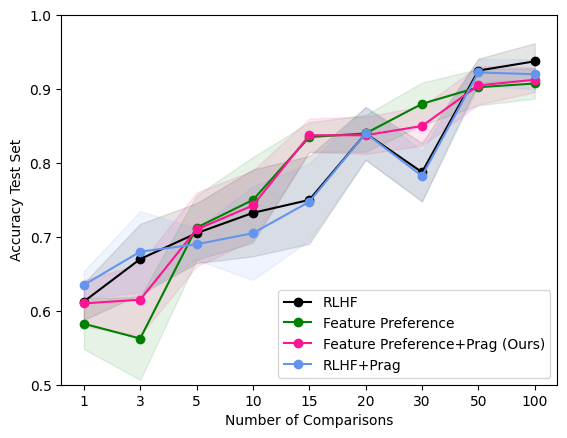

In [3]:
# PLOT SIMULATED COMPARISONS (MUSHROOMS) dense
comparisons = [1,3,5,10,15,20,30,50,100]

rlhf_probs = [0.6310343232588647, 0.8299117227196693, 0.9320063665509224, 0.9335324731054306, 0.9244690388441086, 0.9988323358654973, 0.9999715101565735, 0.9999278411269188, 0.9999666507012482]
rlhf_probs_err = [0.10502589209042235, 0.05224083896538656, 0.0404770739569324, 0.027772209764121406, 0.03900920333427176, 0.0009923881834660032, 2.1455417567243695e-05, 2.98766032389426e-05, 1.0994888265312566e-05]
rlhf_correct = [0.6124999999999999, 0.6699999999999999, 0.705, 0.7324999999999999, 0.7500000000000001, 0.8400000000000001, 0.7875000000000001, 0.925, 0.9375]
rlhf_cor_err = [0.024855519456207375, 0.047608022161790914, 0.040520699668499336, 0.05876211400647807, 0.05931783392113383, 0.035511871928594616, 0.0397645773784099, 0.01620034673943023, 0.024380114711629696]

featureprefs_probs = [0.6632161753888146, 0.8704013147996734, 0.9997042119503021, 0.970586860762446, 0.9999997168779374, 1.0, 1.0, 1.0, 1.0]
featureprefs_probs_err = [0.1667734734649434, 0.09170111091606066, 0.0002451894596959251, 0.02970148248159213, 1.4266775664036548e-07, 0.0, 0.0, 0.0, 0.0]
featureprefs_correct = [0.5825, 0.5625, 0.7125, 0.7500000000000001, 0.8349999999999999, 0.84, 0.88, 0.9025000000000001, 0.9075]
featureprefs_cor_err = [0.03419549926418816, 0.05601026154675497, 0.04350777935924451, 0.058007277426942674, 0.02007096566454871, 0.02489157598755426, 0.02876963741305195, 0.024504665133537487, 0.020441506352537776]

featureprefshuman_probs  = [0.7690859362483025, 0.952644795179367, 0.9995066225528718, 0.9994781315326691, 0.9998974576592446, 1.0, 1.0, 1.0, 1.0]
featureprefshuman_probs_err = [0.12475340771173032, 0.037656826129733684, 0.00046567599990145835, 0.0004755522058826313, 0.0001024529424523953, 0.0, 0.0, 0.0, 0.0]
featureprefshuman_correct = [0.61, 0.6150000000000001, 0.7100000000000001, 0.7425000000000002, 0.8375, 0.8375, 0.85, 0.905, 0.9125]
featureprefshuman_cor_err = [0.03121152049916743, 0.04853543695281323, 0.05011010096673149, 0.047101259285956044, 0.02261616081556246, 0.025294514500926702, 0.026509007848906176, 0.026017172609571334, 0.01653676270453791]

rlhfhuman_probs = [0.6349266655743122, 0.8162572984927063, 0.9379807636141776, 0.9241888895630966, 0.9169530868530274, 0.9984656870365143, 0.9999849501286942, 0.9999356195330619, 0.9999508857727051]
rlhfhuman_probs_err = [0.10221023932074277, 0.08809297989115683, 0.03662162886569217, 0.03137006082110767, 0.054123455072380175, 0.0013018951080489473, 8.369526032422238e-06, 2.965299653276597e-05, 2.4271696698565626e-05]
rlhfhuman_correct = [0.6349999999999999, 0.6799999999999998, 0.69, 0.7049999999999998, 0.7475000000000001, 0.8400000000000001, 0.7825000000000001, 0.9225, 0.92]
rlhfhuman_cor_err = [0.018556061907496954, 0.054862517513190744, 0.02125, 0.06314445865415474, 0.05190312606096768, 0.03631100268870476, 0.03374033170703542, 0.018157846725905183, 0.02029980180411418]

save_loc = '../results/sim_mushrooms/dense'
plot_comparisons(comparisons, rlhf_probs, featureprefs_probs, featureprefshuman_probs, rlhfhuman_probs, 'Prob GT', save_loc, rlhf_probs_err, featureprefs_probs_err, featureprefshuman_probs_err, rlhfhuman_probs_err)
plot_comparisons(comparisons, rlhf_correct, featureprefs_correct, featureprefshuman_correct, rlhfhuman_correct, 'Accuracy Test Set', save_loc, rlhf_cor_err, featureprefs_cor_err, featureprefshuman_cor_err, rlhfhuman_cor_err)


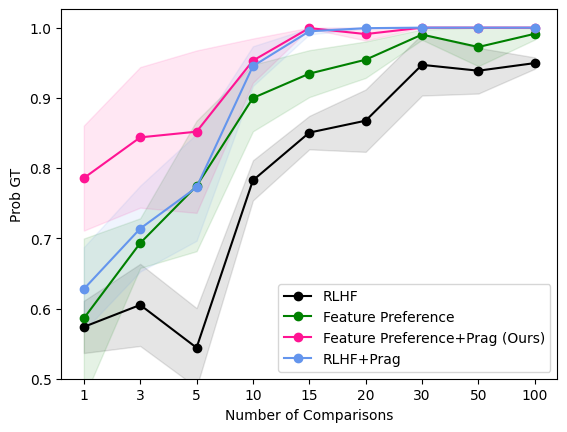

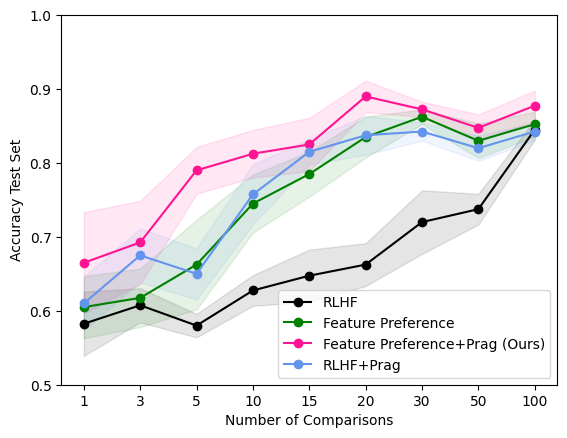

In [4]:
# PLOT SIMULATED COMPARISONS (MUSHROOMS) 1feat
comparisons = [1,3,5,10,15,20,30,50,100]

rlhf_probs = [0.5738184574106575, 0.6050981345577271, 0.5441538717379941, 0.7824786168386804, 0.8504898292230378, 0.867497242465023, 0.9470313097333684, 0.9386821676858684, 0.9495134152872836]
rlhf_probs_err = [0.037211101198647755, 0.058456892562901914, 0.05643114650567854, 0.028560377615426107, 0.023797859164781236, 0.04440384066945192, 0.04373777938103316, 0.0325411428396346, 0.008131748366029579]
rlhf_correct = [0.5825, 0.6075, 0.5800000000000001, 0.6275, 0.6475, 0.6625, 0.72, 0.7375, 0.845]
rlhf_cor_err = [0.04334485260218204, 0.023052575361331802, 0.015912388198380916, 0.020728877193645958, 0.03528453924263485, 0.02891589840880525, 0.04294253156380226, 0.020786574350215853, 0.013474811741473768]
featureprefs_probs = [0.585990131437961, 0.6931565941455409, 0.7744749653956141, 0.8998124420917362, 0.9344953077094563, 0.954344616786262, 0.9901265085218743, 0.9724491413698508, 0.991231928647659]
featureprefs_probs_err = [0.11371514079704209, 0.035330659588523124, 0.09292166078528412, 0.04749590339362176, 0.033401138172572885, 0.025944306035136733, 0.007391374531236242, 0.02732261025383909, 0.008232853259731606]
featureprefs_correct = [0.6049999999999999, 0.6175000000000001, 0.6625, 0.7449999999999999, 0.785, 0.835, 0.8625, 0.83, 0.8525]
featureprefs_cor_err = [0.0419531591742434, 0.039579655481970446, 0.06056044377029621, 0.03919197423454886, 0.030482345071206283, 0.02765564437074486, 0.009779548340398452, 0.023376372625943656, 0.016682558442379123]
featureprefshuman_probs = [0.7857502832949207, 0.8437255791049746, 0.8518474916157648, 0.9530476223022353, 0.9993853437495821, 0.9908603081384103, 1.0, 1.0, 1.0]
featureprefshuman_probs_err = [0.07482758792487789, 0.10010000360669266, 0.11563695610163746, 0.0314938658904052, 0.0006065743814308572, 0.009139691861589666, 0.0, 0.0, 0.0]
featureprefshuman_correct = [0.665, 0.6925, 0.7899999999999999, 0.8125, 0.8250000000000001, 0.89, 0.8725, 0.8475, 0.8774999999999999]
featureprefshuman_cor_err = [0.06841817283269431, 0.05626889602895995, 0.03159177932191906, 0.032157417267971136, 0.03608255978766348, 0.021307335193779867, 0.010386778536930087, 0.018142346725277706, 0.020332767293929723]
rlhfhuman_probs = [0.6277052516452835, 0.7137914178728732, 0.7725599728743018, 0.9452387680641042, 0.9948061732230363, 0.9992609504349683, 0.9999997545907527, 0.9999983264708225, 0.9999751369526357]
rlhfhuman_probs_err = [0.059684926092058, 0.061150918680664056, 0.07608582124014351, 0.02828162636563896, 0.004458086692197262, 0.0006180058941106542, 0.00000011977632575990505, 0.0000004618800227092252, 0.000002762495638688136]
rlhfhuman_correct = [0.61, 0.675, 0.65, 0.7575, 0.8149999999999999, 0.8375, 0.8425, 0.82, 0.8425]
rlhfhuman_cor_err = [0.03617244370778151, 0.036536601772454186, 0.03464413189918771, 0.040811005939496015, 0.017078251276599324, 0.026291528696028946, 0.012282767293929725, 0.017070370312365963, 0.011859318376663377]

save_loc = '../results/sim_mushrooms/1feat'
plot_comparisons(comparisons, rlhf_probs, featureprefs_probs, featureprefshuman_probs, rlhfhuman_probs, 'Prob GT', save_loc, rlhf_probs_err, featureprefs_probs_err, featureprefshuman_probs_err, rlhfhuman_probs_err)
plot_comparisons(comparisons, rlhf_correct, featureprefs_correct, featureprefshuman_correct, rlhfhuman_correct, 'Accuracy Test Set', save_loc, rlhf_cor_err, featureprefs_cor_err, featureprefshuman_cor_err, rlhfhuman_cor_err)


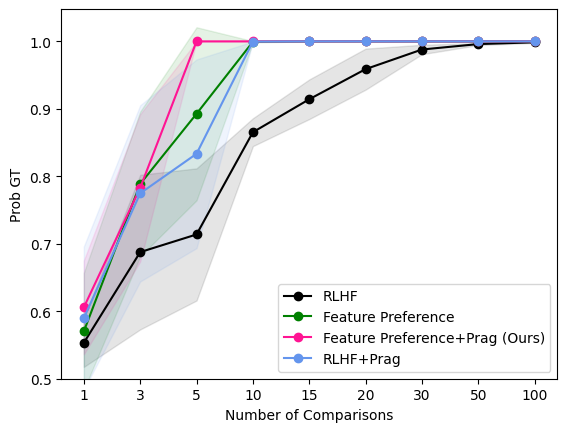

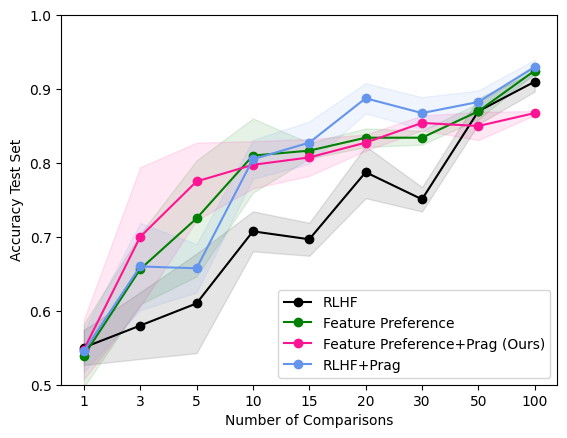

In [5]:
# PLOT SIMULATED COMPARISONS (MUSHROOMS) 3feat
comparisons = [1,3,5,10,15,20,30,50,100]

rlhf_probs = [0.5532259335396466, 0.6876616232545563, 0.7138275993056595, 0.8654103757192691, 0.9142433705705184, 0.9588855881997755, 0.9879471986428044, 0.9959929607532642, 0.9986184825328254]
rlhf_probs_err = [0.03570066076272444, 0.11461326531885612, 0.09792974090790043, 0.02066911643086323, 0.029368147938174, 0.030415808544630474, 0.006953554856175738, 0.0015111018791515968, 0.0009721562117140384]
rlhf_correct = [0.5503333333333332, 0.58, 0.61, 0.7075, 0.6967500000000001, 0.7875, 0.7508333333333334, 0.87, 0.91]
rlhf_cor_err = [0.023646450076292626, 0.045166474860854, 0.06736336742323456, 0.027049871774670962, 0.02233032647733206, 0.035225693303899924, 0.01650094583990384, 0.017592733781325776, 0.013333333333333331]
featureprefs_probs = [0.5701636181500453, 0.7886832561137228, 0.8926940407115381, 0.9994565228580512, 0.9999379279726402, 1.0, 1.0, 1.0, 1.0]
featureprefs_probs_err = [0.08682315064217581, 0.10730118073389215, 0.12822612536356348, 0.0009150693388805033, 0.000051917736265681017, 4.415158877391079e-09, 0.0, 0.0, 0.0]
featureprefs_correct = [0.5393333333333332, 0.6563333333333333, 0.725, 0.81, 0.8166666666666667, 0.8341666666666666, 0.8341666666666666, 0.87, 0.9249999999999999]
featureprefs_cor_err = [0.042661058940703195, 0.047614624013294944, 0.07844179684011095, 0.05023695675063947, 0.010466643909254783, 0.01259184076712585, 0.009396165695668681, 0.011047466067141537, 0.00403043720513583]
featureprefshuman_probs = [0.6057176488123212, 0.7829428170979791, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
featureprefshuman_probs_err = [0.06951020905233306, 0.10923625107438072, 2.4559321226691466e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
featureprefshuman_correct = [0.5475, 0.7, 0.775, 0.7975, 0.8075, 0.8275, 0.8541666666666666, 0.8500000000000001, 0.8675]
featureprefshuman_cor_err = [0.0403358358050541, 0.09427583917528257, 0.05240828795626567, 0.032008639332573434, 0.02497218603547992, 0.0109593458111268, 0.009980377380375432, 0.0190677405442369, 0.002886751345948098]
rlhfhuman_probs = [0.5898144703522256, 0.7747649295609639, 0.8333940533403721, 0.9996769232330499, 0.9999962915424947, 0.9999999895139977, 1.0, 1.0, 1.0]
rlhfhuman_probs_err = [0.10617069711752708, 0.13057132817632614, 0.13980971032428808, 0.00013371796564650234, 3.472761737363441e-06, 1.045305609862435e-08, 0.0, 0.0, 0.0]
rlhfhuman_correct = [0.545, 0.6600000000000001, 0.6575, 0.805, 0.8275000000000001, 0.8875000000000002, 0.8675, 0.8825, 0.9299999999999999]
rlhfhuman_cor_err = [0.027512401497865577, 0.05891547398368962, 0.03261746318492414, 0.026286981868802258, 0.028775735660077618, 0.020477527930725912, 0.02151938941706394, 0.015610346934981153, 0.009574271077563304]

save_loc = '../results/sim_mushrooms/3feat'
plot_comparisons(comparisons, rlhf_probs, featureprefs_probs, featureprefshuman_probs, rlhfhuman_probs, 'Prob GT', save_loc, rlhf_probs_err, featureprefs_probs_err, featureprefshuman_probs_err, rlhfhuman_probs_err)
plot_comparisons(comparisons, rlhf_correct, featureprefs_correct, featureprefshuman_correct, rlhfhuman_correct, 'Accuracy Test Set', save_loc, rlhf_cor_err, featureprefs_cor_err, featureprefshuman_cor_err, rlhfhuman_cor_err)
